In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("candy-data.csv")

In [5]:
print(df.shape)
df.head()

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

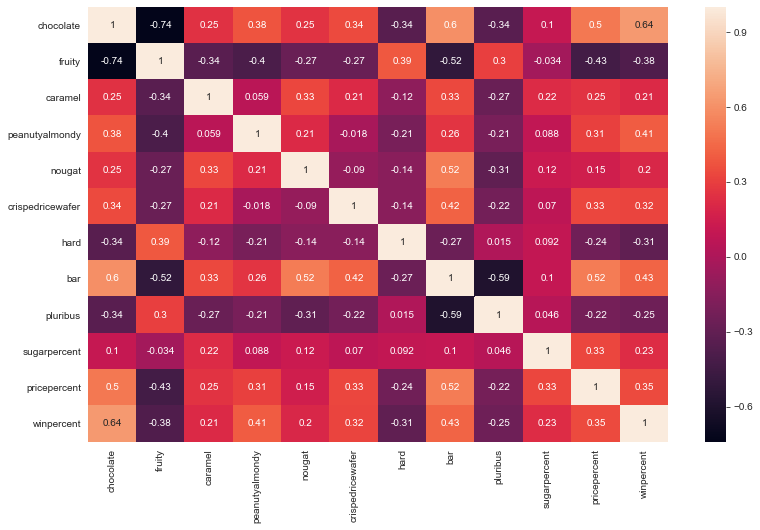

In [7]:
sns.set_style('darkgrid')
corr = df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot = True)

No strong correlation

Predicting wether candy is a bar or not

In [8]:
df1=df.copy()
df1.drop("competitorname", axis=1, inplace=True)

In [9]:
X = df1.drop(["bar", "winpercent"], axis=1)
y =df1["bar"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [10]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

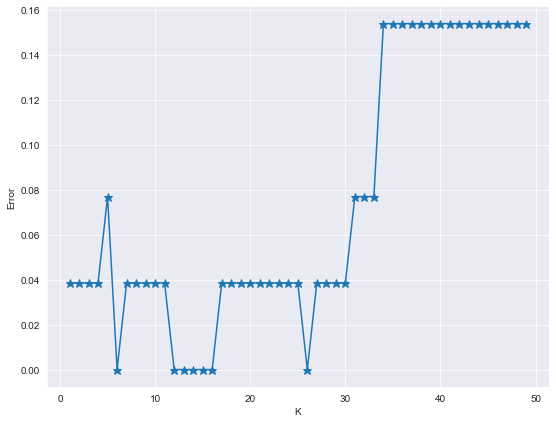

In [11]:
plt.figure(figsize=(9,7))
plt.xlabel("K")
plt.ylabel("Error")
plt.plot(range(1,50), error, marker = "*" , markersize = 9)


In [12]:
models = {

    "                   Logistic Regression": LogisticRegression(),
    "        K-Nearest Neighbors Classifier": KNeighborsClassifier(n_neighbors=13),
    "                        SVM Classifier": SVC(),
}

In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                   Logistic Regression trained.
        K-Nearest Neighbors Classifier trained.
                        SVM Classifier trained.


C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                   Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.96154
Training Accuracy: 0.94915
------------------------------------------------------------


        K-Nearest Neighbors Classifier
------------------------------------------------------------
Testing Accuracy: 1.00000
Training Accuracy: 0.94915
------------------------------------------------------------


                        SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.96154
Training Accuracy: 0.94915
------------------------------------------------------------




In [15]:
from sklearn.model_selection import cross_val_score

In [18]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=10))
    print("-----------------------------------------------------")

                   Logistic Regression 

[1.         0.75       1.         0.66666667 1.         1.
 1.         1.         1.         1.        ]
-----------------------------------------------------
        K-Nearest Neighbors Classifier 

[0.75       0.75       0.66666667 0.66666667 1.         1.
 1.         1.         1.         1.        ]
-----------------------------------------------------
                        SVM Classifier 

[0.75       0.75       0.66666667 0.66666667 1.         1.
 1.         1.         1.         1.        ]
-----------------------------------------------------


C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [91]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

Perdicting winpercent

In [166]:
sc = MinMaxScaler()

X = df1[["chocolate", "peanutyalmondy", "bar", "pricepercent", "fruity", "caramel", "pluribus"]]
y =df1["winpercent"]

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [167]:
models = {

    "                   Linear Regression": LinearRegression(),
    "        K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=13),
    "                        SVM Regressor": SVR(),
}

In [168]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Linear Regression trained.
        K-Nearest Neighbors Regressor trained.
                        SVM Regressor trained.


In [169]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')
                     

                   Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.38730
Training Accuracy: 0.45553
------------------------------------------------------------


        K-Nearest Neighbors Regressor
------------------------------------------------------------
Testing Accuracy: 0.25820
Training Accuracy: 0.44058
------------------------------------------------------------


                        SVM Regressor
------------------------------------------------------------
Testing Accuracy: 0.06711
Training Accuracy: 0.15732
------------------------------------------------------------




In [170]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

for i in range(2,8):

    polynomial_features= PolynomialFeatures(degree=i)
    x_poly_train = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.fit_transform(X_test)

    model.fit(x_poly_train, y_train)

    y_poly_pred_train = model.predict(x_poly_train)
    y_poly_pred_test = model.predict(x_poly_test)

    r2_train = r2_score(y_train,y_poly_pred_train)
    r2_test = r2_score(y_test, y_poly_pred_test)
    print("degree: ",i)
    print("r2_training: ",r2_train)
    print("r2_testing: ",r2_test)
    print("-------------")

degree:  2
r2_training:  0.7115382283671285
r2_testing:  0.5479363670217341
-------------
degree:  3
r2_training:  0.7290955949508191
r2_testing:  -1.0117217182433014e+25
-------------
degree:  4
r2_training:  0.7777754841034548
r2_testing:  -10.710013748025826
-------------
degree:  5
r2_training:  0.8042147327009836
r2_testing:  -19.631387270863126
-------------
degree:  6
r2_training:  0.8056419767943247
r2_testing:  -10.479232560407146
-------------
degree:  7
r2_training:  0.8094915956053668
r2_testing:  -362.9412159731021
-------------
